# Brain Stroke CT - Exploratory Data Analysis
This notebook explores the class distribution, image dimensions, and pixel intensity histograms of the dataset.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Config
DATA_DIR = '../Brain_Stroke_CT_Dataset'
FOLDERS = ['Bleeding', 'Ischemia', 'Normal']
EXT_TEST = 'External_Test'

## 1. Class Distribution (Train/Val Folders)

Class Distribution: {'Bleeding': 2186, 'Ischemia': 2260, 'Normal': 4427}


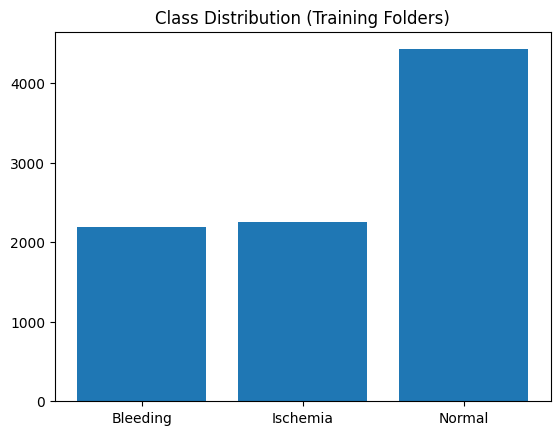

In [2]:
stats = {}
for folder in FOLDERS:
    files = glob.glob(os.path.join(DATA_DIR, folder, '*.png'))
    # Attempt to handle if they are in subfolders (some datasets differ)
    if not files:
       files = glob.glob(os.path.join(DATA_DIR, folder, '*', '*.png')) 
    stats[folder] = len(files)

print("Class Distribution:", stats)
plt.bar(stats.keys(), stats.values())
plt.title("Class Distribution (Training Folders)")
plt.show()

## 2. External Test Set Check

In [3]:
test_csv_path = os.path.join(DATA_DIR, EXT_TEST, 'labels.csv')
if os.path.exists(test_csv_path):
    df_test = pd.read_csv(test_csv_path)
    print(df_test.head())
    print("\nTest Set Class Balance:")
    print(df_test['Stroke'].value_counts())
else:
    print("No labels.csv found in External_Test")

   image_id  Stroke
0     10189       0
1     10200       0
2     10231       0
3     10267       0
4     10300       0

Test Set Class Balance:
Stroke
0    130
1     70
Name: count, dtype: int64


## 3. Sample Visualization & Resolution Check

Bleeding Resolution: (512, 512)


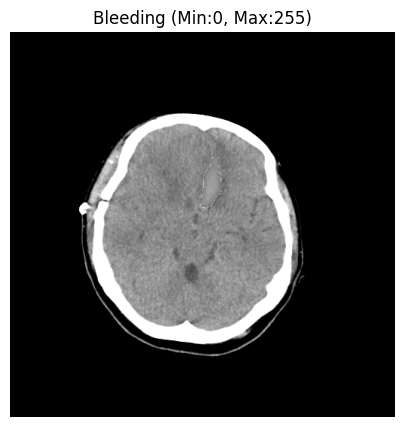

/tmp/ipykernel_3743/1579306053.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0,256])


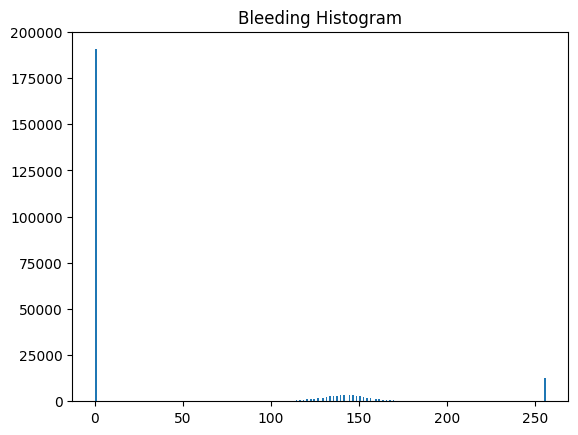

Ischemia Resolution: (512, 512)


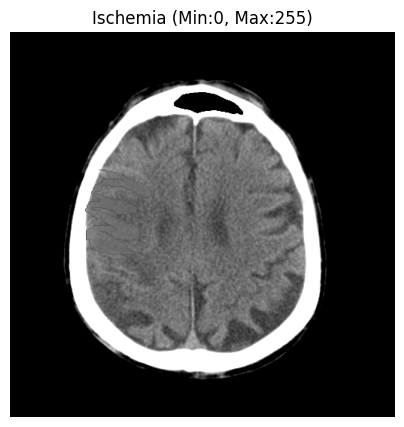

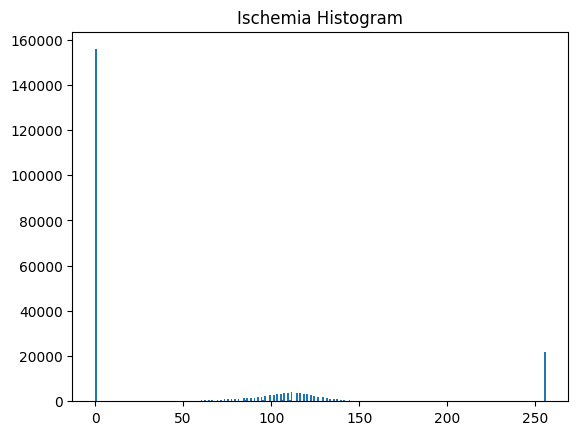

Normal Resolution: (512, 512)


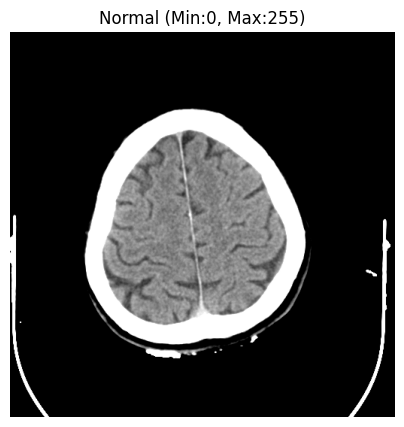

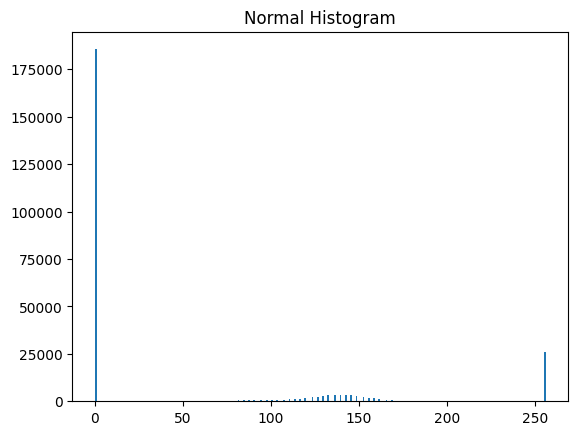

In [4]:
def show_sample(folder, title):
    base_path = os.path.join(DATA_DIR, folder)
    # Try direct
    files = glob.glob(os.path.join(base_path, '*.png'))
    if not files:
        # Try one level deep (e.g. Normal/PNG/1.png)
        files = glob.glob(os.path.join(base_path, '*', '*.png'))
    
    if not files: 
        print(f"No images found for {folder}")
        return
    
    img_path = files[0]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    print(f"{title} Resolution: {img.shape}")
    
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.title(f"{title} (Min:{img.min()}, Max:{img.max()})")
    plt.axis('off')
    plt.show()
    
    # Histogram
    plt.hist(img.ravel(), 256, [0,256])
    plt.title(f"{title} Histogram")
    plt.show()

for folder in FOLDERS:
    show_sample(folder, folder)